In [ ]:
!wget -O train.zip "https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=1"

!unzip train.zip

--2025-03-27 04:20:32--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7f8720b9297ac99df6cffccbf.dl.dropboxusercontent.com/cd/0/inline/CmpXfnaId9B2WX6bcfIJMWm-qNywEpfKqsvBYv48w_x9w5P91yQJHcSLMWXolDyQbsqr-iG1FlnfZfpwKrC2N1795FoZDJHldWNQnMub5X1mu5hoIJh_rAC5rm6YONXrIZDDEB1X5jSIKxYqOEwN2gmk/file?dl=1# [following]
--2025-03-27 04:20:32--  https://uce7f8720b9297ac99df6cffccbf.dl.dropboxusercontent.com/cd/0/inline/CmpXfnaId9B2WX6bcfIJMWm-qNywEpfKqsvBYv48w_x9w5P91yQJHcSLMWXolDyQbsqr-iG1FlnfZfpwKrC2N1795FoZDJHldWNQnMub5X1mu5hoIJh_rAC5rm6YONXrIZDDEB1X5jSIKxYqOEwN2gmk/file?dl=1
Resolving uce7f8720b9297ac99df6cffccbf.dl.dropboxusercontent.com (uce7f8720b9297ac99df6cffccbf.dl.dropboxusercontent.com)... 162.125.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
#working with pre-trained model
base_model = MobileNet(input_shape = (224,224,3), include_top = False)
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units = 7, activation = 'softmax')(x)

#creating model
model = Model(base_model.input, x)

In [ ]:
model.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


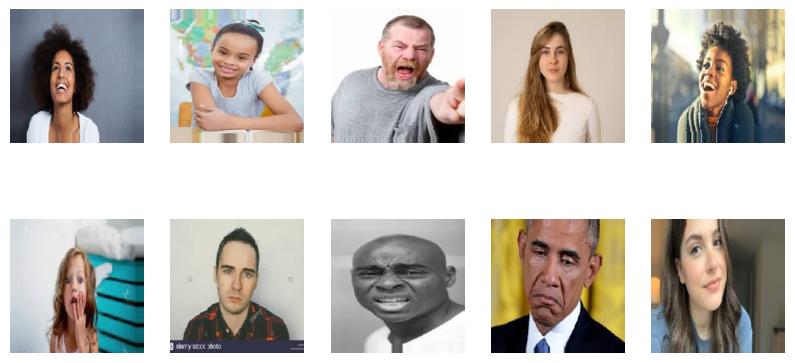

In [ ]:
# Fetch a batch of images and labels from the generator
t_img, label = next(train_data)

def plotImages(img_arr):
    """
    Function to display images from the dataset.

    Parameters:
    img_arr: Array of images from ImageDataGenerator.
    """
    plt.figure(figsize=(10, 5))  # Adjust figure size

    for i in range(min(10, len(img_arr))):  # Show up to 10 images
        plt.subplot(2, 5, i + 1)
        plt.imshow((img_arr[i] * 255).astype("uint8"))  # Rescale pixel values
        plt.axis("off")  # Remove axes for better visualization

    plt.show()

# Call function to display images
plotImages(t_img)

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit(
    train_data,  # Training dataset
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]  # Callbacks for early stopping & model checkpoint
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2207 - loss: 7.7278
Epoch 1: val_accuracy improved from -inf to 0.60156, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.2258 - loss: 7.7128 - val_accuracy: 0.6016 - val_loss: 2.4807
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3750 - loss: 5.2116

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.60156
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3750 - loss: 5.2116 - val_accuracy: 0.5742 - val_loss: 2.8468
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5889 - loss: 2.4544
Epoch 3: val_accuracy improved from 0.60156 to 0.82422, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5928 - loss: 2.4307 - val_accuracy: 0.8242 - val_loss: 0.8543
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6250 - loss: 1.6820
Epoch 4: val_accuracy improved from 0.82422 to 0.86328, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6250 - loss: 1.6820 - val_accuracy: 0.8633 - val_loss: 0.6705
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8292 - loss: 0.8156
Epoch 5: val_accuracy improved from 0.86328 to 0.90625, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.8287 - loss: 0.8188 - val_accuracy: 0.9062 - val_loss: 0.5755
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7500 - loss: 1.4404
Epoch 6: val_accuracy did not improve from 0.90625
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7500 - loss: 1.4404 - val_accuracy: 0.9023 - val_loss: 0.4807
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8537 - loss: 0.9094
Epoch 7: val_accuracy improved from 0.90625 to 0.91797, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8533 - loss: 0.9049 - val_accuracy: 0.9180 - val_loss: 0.2708
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9375 - loss: 0.3560
Epoch 8: val_accuracy did not improve from 0.91797
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9375 - loss: 0.3560 - val_accuracy: 0.9180 - val_loss: 0.2887
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9218 - loss: 0.3442
Epoch 9: val_accuracy improved from 0.91797 to 0.94531, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9197 - loss: 0.3580 - val_accuracy: 0.9453 - val_loss: 0.1756
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8438 - loss: 0.8002
Epoch 10: val_accuracy did not improve from 0.94531
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8438 - loss: 0.8002 - val_accuracy: 0.9453 - val_loss: 0.3346
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9298 - loss: 0.2838
Epoch 11: val_accuracy improved from 0.94531 to 0.95703, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9310 - loss: 0.2772 - val_accuracy: 0.9570 - val_loss: 0.1490
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8438 - loss: 0.8260
Epoch 12: val_accuracy improved from 0.95703 to 0.96484, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8438 - loss: 0.8260 - val_accuracy: 0.9648 - val_loss: 0.1072
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9496 - loss: 0.2024
Epoch 13: val_accuracy improved from 0.96484 to 0.99609, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9482 - loss: 0.2041 - val_accuracy: 0.9961 - val_loss: 0.0097
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9688 - loss: 0.0431
Epoch 14: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9688 - loss: 0.0431 - val_accuracy: 0.9883 - val_loss: 0.0316
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9705 - loss: 0.1276
Epoch 15: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9698 - loss: 0.1335 - val_accuracy: 0.9922 - val_loss: 0.0352
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0427
Epoch 16: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0427 - val_accuracy: 0.9883 - val_loss: 0.0425
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9698 - loss: 0.0893
Epoch 17: val_accuracy improved from 0.99609 t

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9703 - loss: 0.0929 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0241
Epoch 18: val_accuracy did not improve from 1.00000
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 18: early stopping


In [ ]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Print final accuracy
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000


In [ ]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
 the image is of Happy


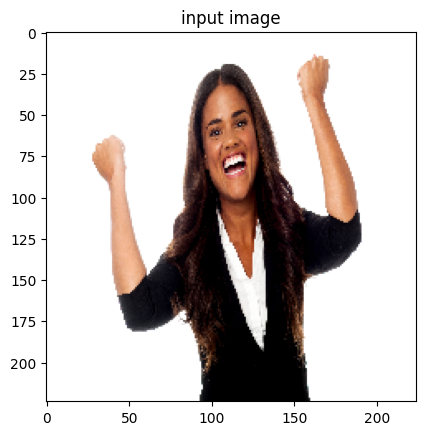

In [ ]:
# path for the image to see if it predics correct class

path = "/content/happy-girl-16.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

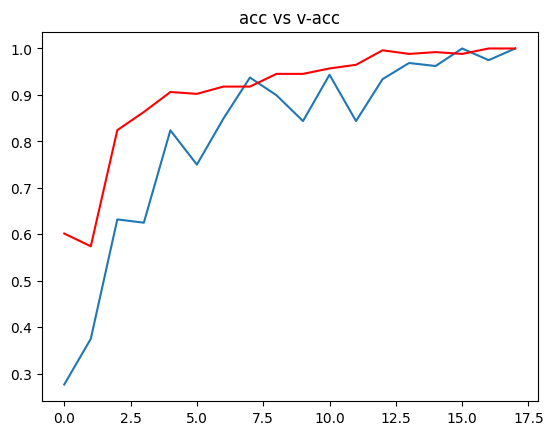

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

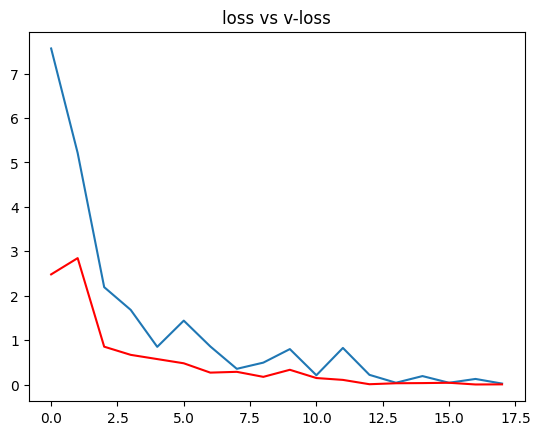

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()